(224, 224, 3)


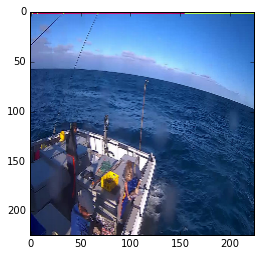

In [100]:
import pandas as pd
import numpy as np
import glob
from sklearn import cluster
from scipy.misc import imread
from skimage import transform as sk_transform
from skimage.exposure import adjust_gamma as gamma
# import progressbar
import multiprocessing
import random
from data_jitter import _load_img
import matplotlib.pyplot as plt
%matplotlib inline

new_style = {'grid': False}
plt.rc('axes', **new_style)

img = _load_img('../input/train/ALB/img_00032.jpg', (224,224), swapaxes=False, normalize=True)
#img = gamma(img, 1+(np.random.rand()-0.5)*0.5)
print(img.shape)
plt.imshow(img)

In [101]:
pos = np.array(range(10))
y = np.array([3,5,4,7,3,5,5,3,1,2])

In [104]:
from sklearn.utils import shuffle
pos, y = shuffle(pos, y, random_state=0)

In [105]:
pos, y

(array([2, 8, 4, 9, 1, 6, 7, 3, 0, 5]), array([4, 1, 3, 2, 5, 5, 3, 7, 3, 5]))

In [106]:
y_pseudo = [3,5,2,3,6]

In [124]:
j = []
for i in range(5,10):
    k = np.where(pos==i)
    j.append(int(k[0]))

print(j)
y[np.array(j)] = [1,2,3,4,5]
y

[9, 5, 6, 1, 3]


array([4, 4, 3, 5, 5, 2, 3, 7, 3, 1])

In [125]:
from PIL import ImageEnhance

In [128]:
enhancer = ImageEnhance.Sharpness(img)

for i in range(8):
    factor = i / 4.0
    enhancer.enhance(factor).show("Sharpness %f" % factor)

AttributeError: 'numpy.ndarray' object has no attribute 'filter'

In [142]:
corrections = pd.read_csv("../input/corrections.csv")
fish_type_id = {'ALB':0, 'BET':1, 'DOL':2, 'LAG':3, 'NoF':4, 'OTHER':5, 'SHARK':6, 'YFT':7}
corrections = corrections.replace({"type": fish_type_id})

In [143]:
print(corrections)

            image  type
0   img_00136.jpg     5
1   img_00248.jpg     5
2   img_01363.jpg     5
3   img_03544.jpg     5
4   img_07195.jpg     5
5   img_00568.jpg     4
6   img_00126.jpg     3
7   img_02302.jpg     0
8   img_04052.jpg     0
9   img_06478.jpg     0
10  img_06266.jpg     7
11  img_02086.jpg     7
12  img_01452.jpg     3
13  img_06453.jpg     0
14  img_05974.jpg     0
15  img_05736.jpg     0
16  img_05110.jpg     0
17  img_05402.jpg     0
18  img_05065.jpg     0
19  img_04938.jpg     0
20  img_04931.jpg     0
21  img_04815.jpg     0
22  img_04304.jpg     0
23  img_04179.jpg     0
24  img_04048.jpg     0
25  img_04039.jpg     0
26  img_03287.jpg     0
27  img_02976.jpg     0
28  img_02840.jpg     0
29  img_02742.jpg     0
30  img_02498.jpg     0
31  img_02358.jpg     0
32  img_02206.jpg     0
33  img_02139.jpg     0
34  img_02138.jpg     0
35  img_02097.jpg     0
36  img_01943.jpg     0
37  img_01912.jpg     0
38  img_01351.jpg     0
39  img_01218.jpg     0
40  img_01234.jp

In [134]:
from data_pretrained import load_train_data
X,y,ids = load_train_data()

Loading training images
Load folder ALB (Index: 0)
Load folder BET (Index: 1)
Load folder DOL (Index: 2)
Load folder LAG (Index: 3)
Load folder NoF (Index: 4)
Load folder OTHER (Index: 5)
Load folder SHARK (Index: 6)
Load folder YFT (Index: 7)
Read train data time: 280.36 seconds


In [138]:
print(ids[:10])

['img_00003.jpg', 'img_00010.jpg', 'img_00012.jpg', 'img_00015.jpg', 'img_00019.jpg', 'img_00020.jpg', 'img_00029.jpg', 'img_00032.jpg', 'img_00037.jpg', 'img_00038.jpg']


In [139]:
a = np.in1d(np.array(ids), np.array(corrections['image']))

In [140]:
print(a[:10])

[False False False False False False False False False False]


In [144]:
y[a] = np.array(corrections['type']) #convert corrections to numeric

In [145]:
y[a]

array([5, 5, 5, 5, 5, 4, 3, 0, 0, 0, 7, 7, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)